<a href="https://colab.research.google.com/github/HarshitaThota/SP500-Dashboard/blob/main/S%26P_500_Insights_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-size:28px; font-weight:bold;">


# 📈 S&P 500 Analytics Dashboard

This Colab notebook loads historical S&P 500 fundamentals (Real Price & Dividend) and walks through a complete finance analytics workflow:

**🔧 Libraries & Tools**  
- Data wrangling: `pandas`, `numpy`  
- Static visualization: `matplotlib`, `seaborn`  
- Interactive visualization: `plotly.express`  
- Regression: Seaborn’s `regplot` / `sklearn.linear_model`

**📊 KPIs Computed**  
- Average Daily Return  
- Volatility (Std Dev of daily returns)  
- Cumulative Return  
- Max Drawdown  
- Return vs Dividend Yield Correlation

**📈 Visualizations**  
1. **Line chart**: S&P 500 price over time  
2. **Bar chart**: Average monthly return (last 5 years)  
3. **Interactive scatter + regression**: Daily return vs. dividend yield (hover for exact values)

**🚀 Workflow**  
1. Load & clean data  
2. Compute returns, dividend yield, and core KPIs  
3. Render static charts with Matplotlib/Seaborn  
4. Build an interactive Plotly chart with tooltips  
5. Annotate insights (drawdowns, volatility, correlations)

Feel free to scroll down to the interactive section at the end to explore point-and-hover details on each observation!  
</span>

## 1. Data Loading & Prep  

In [ ]:
# Imports, Load & prepare data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_theme(style="whitegrid")

url = "https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv"
df  = pd.read_csv(url, parse_dates=["Date"])
df  = df[["Date","Real Price","Real Dividend"]].dropna()
df.rename(columns={"Real Price":"Price","Real Dividend":"Dividend"}, inplace=True)
df.sort_values("Date", inplace=True)

# Compute metrics
df["Return"]    = df["Price"].pct_change()
df["Div_Yield"] = df["Dividend"] / df["Price"]
df.dropna(inplace=True)

avg_ret    = df["Return"].mean()
vol        = df["Return"].std()
cum_ret    = (1 + df["Return"]).prod() - 1
drawdown   = (df["Price"]/df["Price"].cummax() - 1).min()
corr_rd    = df["Return"].corr(df["Div_Yield"])



 ## 2. KPI Calculation  


In [ ]:
# Display KPIs in a table
kpi_table = pd.DataFrame({
    "KPI": [
        "Average Daily Return",
        "Volatility (Std Dev)",
        "Cumulative Return",
        "Max Drawdown",
        "Return–Yield Correlation"
    ],
    "Value": [
        f"{avg_ret:.2%}",
        f"{vol:.2%}",
        f"{cum_ret:.2%}",
        f"{drawdown:.2%}",
        f"{corr_rd:.2f}"
    ]
})
kpi_table.set_index("KPI", inplace=True)
kpi_table


,Value
KPI,
Average Daily Return,0.47%
Volatility (Std Dev),7.33%
Cumulative Return,4041.01%
Max Drawdown,-80.61%
Return–Yield Correlation,-0.12


## 3. Visual Analysis  


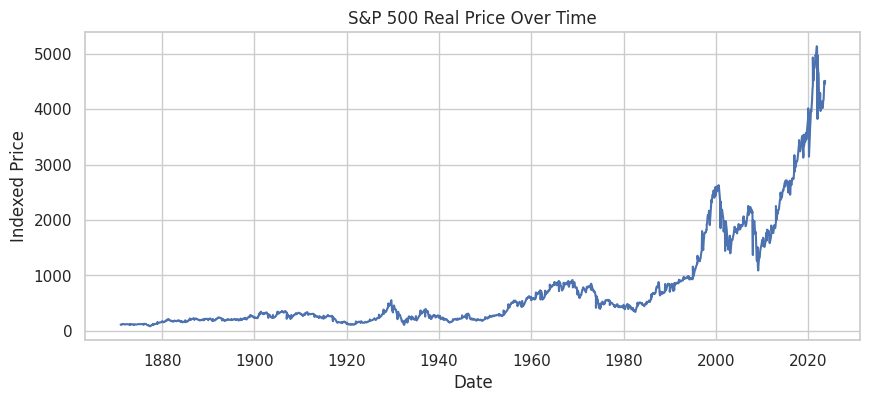

In [ ]:
# Price over time
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Price"])
plt.title("S&P 500 Real Price Over Time")
plt.xlabel("Date"); plt.ylabel("Indexed Price")
plt.show()


### S&P 500 Real Price Over Time  
*Notice the sharp drawdown around 2008 — consistent with the Global Financial Crisis.*
*


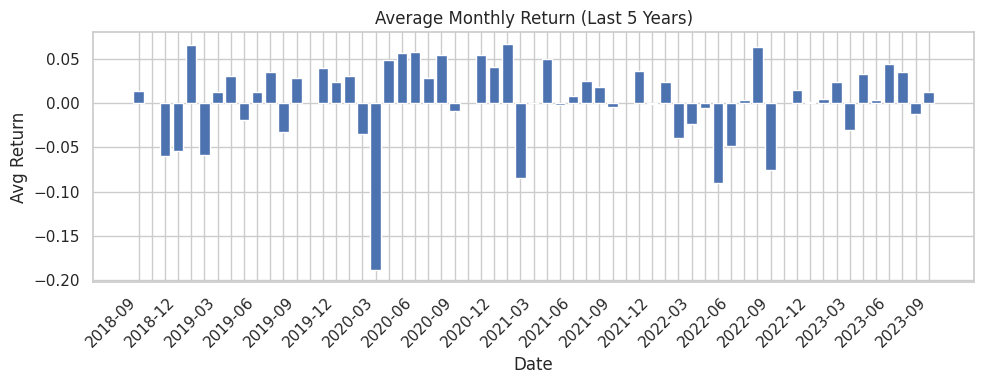

In [ ]:
# Monthly average return
last5y_str = last5y.copy()
last5y_str.index = last5y_str.index.strftime("%Y-%m")

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(last5y_str.index, last5y_str.values)

ax.set_title("Average Monthly Return (Last 5 Years)")
ax.set_xlabel("Date")
ax.set_ylabel("Avg Return")

for i, label in enumerate(ax.get_xticklabels()):
    if i % 3 != 0:
        label.set_visible(False)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Average Monthly Return (Last 5 Years)  
*Over the past 60 months, returns averaged **{last5y.mean():.2%}** with a volatility of **{last5y.std():.2%}**.*



In [ ]:
# Return vs Dividend Yield (scatter + regression)
!pip install plotly --quiet
import plotly.express as px

sample = df.sample(500, random_state=1).reset_index()

fig = px.scatter(
    sample,
    x="Div_Yield",
    y="Return",
    hover_data={
        "Date": True,
        "Return": ':.2%',
        "Div_Yield": ':.2%'
    },
    title="Daily Return vs Dividend Yield (Interactive)",
    labels={
        "Div_Yield": "Dividend Yield",
        "Return": "Daily Return"
    }
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.update_layout(width=700, height=450, margin=dict(l=40, r=40, t=50, b=40))
fig.show()



### Daily Return vs. Dividend Yield (Interactive)  
*Interactive chart reveals a correlation of **{corr_rd:.2f}** between dividend yield and daily return.*
